<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/CNN_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [4]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = models.Sequential()
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu'))
model.add(layers.MaxPool2D(pool_size= (2,2)))
model.add(layers.Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation= 'softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [10]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


In [11]:
%%time


Hist_mnist = model.fit(X_train, y_train,
                       epochs =100,
                       batch_size =128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 33s 10ms/step - loss: 0.3400 - accuracy: 0.8970 - val_loss: 0.1692 - val_accuracy: 0.9462
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0884 - accuracy: 0.9723 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0577 - val_accuracy: 0.9827
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0490 - val_accuracy: 0.9868
Epoch 5/100
375/375 [==============================] - 4s 9ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0455 - val_accuracy: 0.9872
Epoch 6/100
375/375 [==============================] - 4s 9ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0422 - val_accuracy: 0.9884
Epoch 7/100
375/375 [==============================] - 4s 9ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0424 - val_accuracy: 0.98

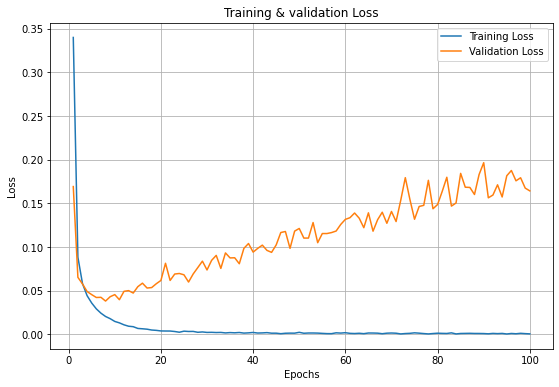

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])

plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9918
Loss = 0.12772
Accuracy = 0.99180
